# Exercise 1:Analysis of Gasoline Prices

Name:Niharika Kumari

In [1]:
import pandas as pd
import numpy as np

# import bokeh 
from IPython.display import display, Markdown
from bokeh.plotting import figure, show, Figure
from bokeh.models import ColumnDataSource, Label
from bokeh.models import HoverTool
from bokeh.models.glyphs import Text
from bokeh.palettes import Spectral3
from bokeh.layouts import row, column, gridplot
import seaborn as sns
import matplotlib.pylab as plt

#from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
import bokeh.models as bmo

from bokeh.sampledata.sample_geojson import geojson
import bokeh.palettes as bp

# tell bokeh to show the figures in the notebook
from bokeh.io import output_notebook
output_notebook()
#latest
import pandas as pd
import missingno as msno
import warnings
warnings.filterwarnings('ignore')





Loading BokehJS ...

We need to clean the station data as there are data missing

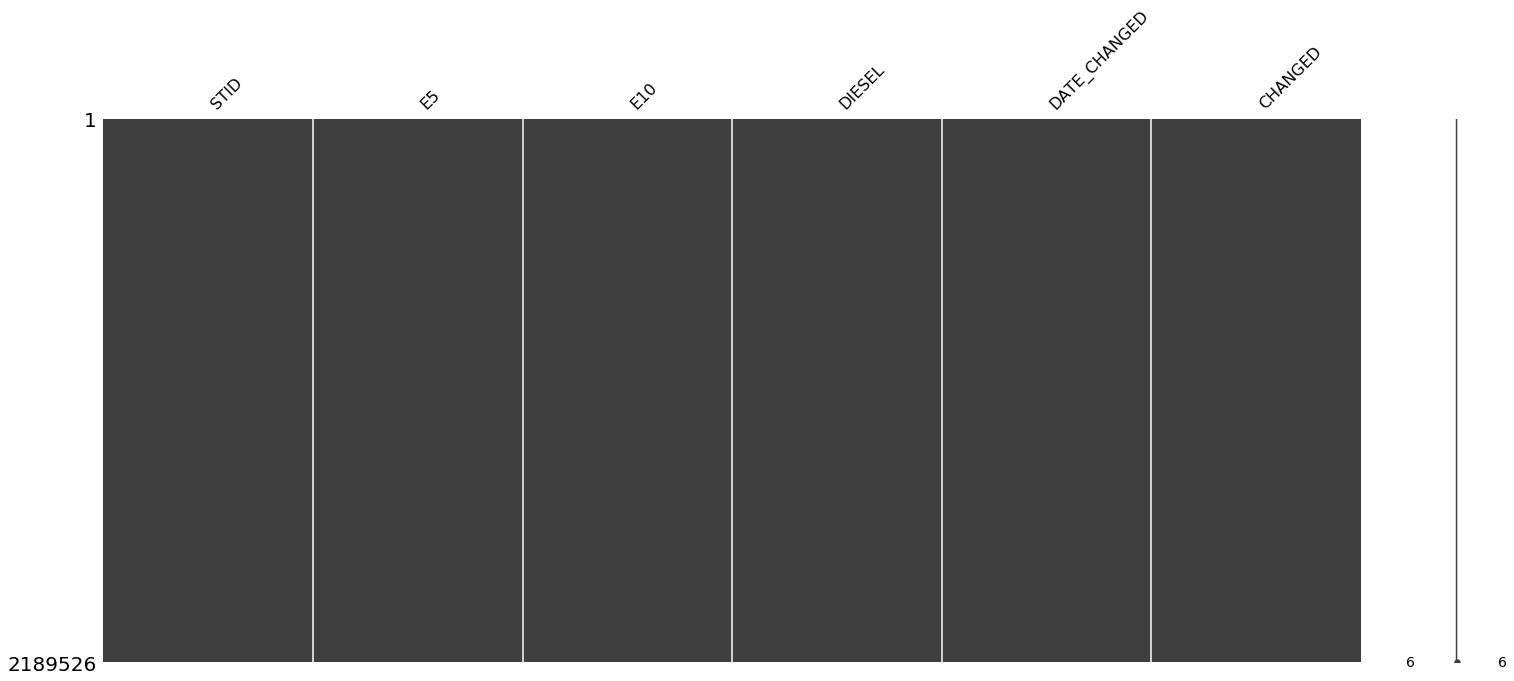

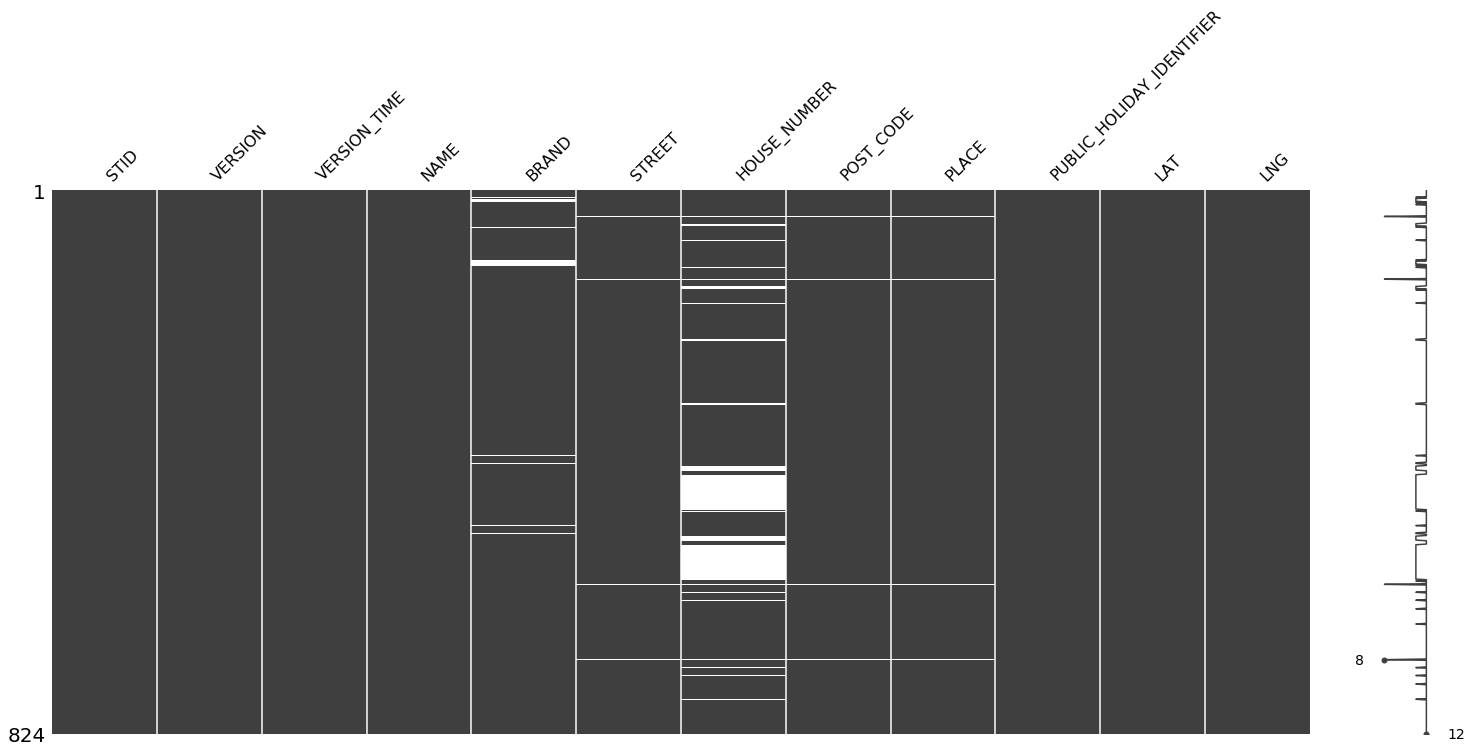

In [2]:
prices = pd.read_csv('example_sprit_cut_prices.csv', sep=';')
msno.matrix(prices)
#print(prices.head())

station = pd.read_csv('example_sprit_cut_station.csv', sep=';')
station.rename(columns={'ID':'STID'}, inplace=True)
msno.matrix(station)
#print(station.head())
#station.info()

# Data Cleaning:

In [3]:
import numpy as np
#remove all unimportant columns from station dataframe  
to_drop = ['HOUSE_NUMBER','PUBLIC_HOLIDAY_IDENTIFIER']
station.drop(to_drop, inplace=True, axis=1)
station.drop_duplicates(keep=False)
station.fillna(0, inplace=True)

    
#ms.matrix(station)
#station = station.replace('', np.nan, inplace=True)
station.fillna(value='UNKNOWN')

#removing non active brands
station = station[station['POST_CODE'] != 'nicht']
#station.loc[station['POST_CODE'] == 'nicht']
station.replace('\\N', 'UNKNOWN', inplace=True)
#station.replace(0, 'UNKNOWN', inplace=True)

station.loc[station['BRAND'] == 'UNKNOWN']
station['POST_CODE'] = station['POST_CODE'].replace('UNKNOWN', '0')
#print(station['POST_CODE'].unique())
station['VERSION_TIME']= pd.to_datetime(station['VERSION_TIME']) 
prices['DATE_CHANGED']= pd.to_datetime(prices['DATE_CHANGED']) 
station['LAT'] = station['LAT'].astype(float)
station['LNG'] = station['LNG'].astype(float)
station = station[station.BRAND != 0]
station = station[station.BRAND != 'UNKNOWN']
station.replace({'BRAND' : { '^Auto Zotz.*' : 'Auto Zotz', 
                                           '^Frei.*' : 'Freie Tankstelle',
                                           '^Raiffeisen.*' : 'Raiffeisen Tankstelle',
                                           '^Sb.*' : 'Sb Markt Tankstelle',
                                           '^Supermarkt.*' : 'Supermarkt Tankstelle'
                                            }},regex=True,inplace=True)

station.replace({'BRAND' : { '^Autohaus Holz.*' : 'Autohaus Holz', 
                                           '^Eberhardt.*' : 'Eberhardt',
                                           '^Globus Handelshof .*' : 'Globus Handelshof Gmbh & Co. Kg',
                                           '^Sbk .*' : 'Sbk - Tankstelle',
                                            }},regex=True,inplace=True)

station['BRAND'].str.upper()

station['BRAND'].unique()

array(['ARAL', 'JET', 'Supermarkt Tankstelle', 'Tankhof Iffezheim',
       'Schiffer & Nicklaus GmbH', 'Sefrin Heizöl & Kraftstoffe', 'bft',
       'Markant', 'AVIA', 'Bft', 'Freie Tankstelle',
       'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen', 'HEM',
       'Fritz Walter GmbH', 'TAMOIL', 'rnt', 'Schuster & Sohn KG',
       'Raiffeisen Tankstelle', 'E Center', 'Eberhardt', 'BFT', 'Agip',
       'Winkler', 'Mr. Wash Autoservice AG', 'ESSO',
       'ZG Raiffeisen Energie', 'freie Tankstelle', 'CLASSIC', 'Shell',
       'Preis', 'mtb', 'Tankcenter', 'TS ARNT', 'frei', 'OMV',
       'Frühmesser GmbH', 'OIL!', 'SB Markt', 'SB', 'TOTAL', 'ED',
       'SB-Markttankstelle',
       'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493', 'Total',
       'Markenfreie TS', 'TOP', 'T', 'ELAN', 'Tankstelle Heinz'], dtype=object)

In [4]:
def remove_invalid_prices(fuel_name):
    fuel_invalid=prices[prices[fuel_name]<=0]
    prices.drop(fuel_invalid.index,axis=0,inplace=True)

remove_invalid_prices('E5')
remove_invalid_prices('E10')
remove_invalid_prices('DIESEL')

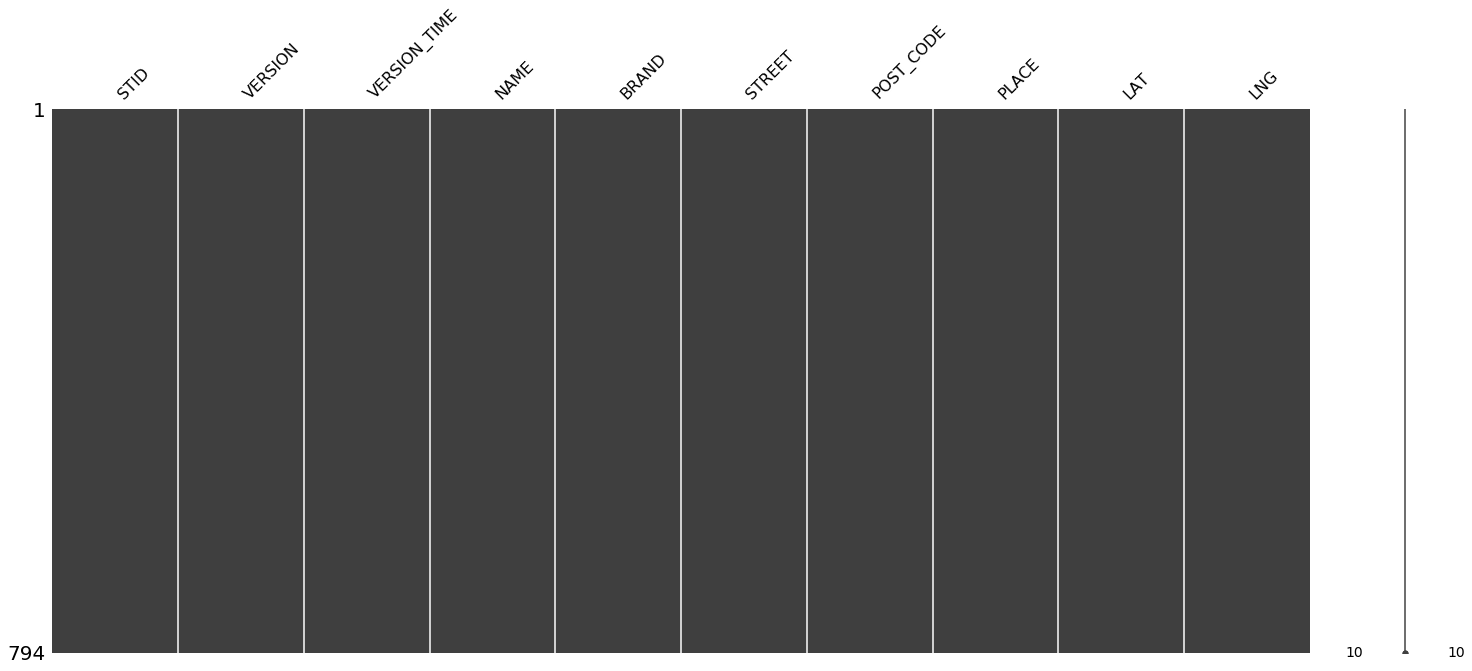

In [5]:
msno.matrix(station)

data is clean.

# 1.How many different stations exist in the dataset and what is the existing history.

In [6]:
#visualisation
import datetime


prices['DATE_CHANGED'] = pd.to_datetime(prices['DATE_CHANGED'])

#station[['LAT', 'LNG','BRAND','NAME','VERSION_TIME']]
#station['DAYS'] = currentDT -station['VERSION_TIME']
#station[['LAT', 'LNG','BRAND','NAME','VERSION_TIME','DAYS']]

In [7]:

merged_df= pd.merge(station,prices, on='STID')

no_of_stations = merged_df.STID.nunique()
no_of_brands = merged_df.BRAND.nunique()
print('No of unique stations are%d'%no_of_stations)
print('No of unique brands are%d'%no_of_brands)

# brand_existence = merged_df.groupby('BRAND')['DATE_CHANGED']
# brand_start=brand_existence.min().reset_index()
# brand_end=brand_existence.max().reset_index()
# # get brand history in days and 
# brand_history = (pd.to_datetime(brand_end['DATE_CHANGED'])-pd.to_datetime(brand_start['DATE_CHANGED'])).dt.days
# brand_end['No of Days'] = brand_history
history =merged_df.groupby(['BRAND']).DATE_CHANGED.agg([min,max]).reset_index()
history['history_days'] = history['max']-history['min']
history['history_days'] =history['history_days'] / np.timedelta64(1, 'D')
history.head(5)

No of unique stations are387
No of unique brands are49


,BRAND,min,max,history_days
0,ARAL,2014-06-08 09:50:01,2015-09-29 23:02:01,478.550000
1,AUTO ZOTZ Herxheim b.LD. Tanken an L.493,2014-06-09 00:02:01,2015-09-29 17:42:01,477.736111
2,AUTO ZOTZ Landau in der Pfalz Tanken und was...,2014-06-09 00:02:01,2015-09-29 15:22:01,477.638889
3,AVIA,2014-06-08 09:50:01,2015-09-29 23:34:01,478.572222
4,Agip,2014-06-08 09:50:01,2015-09-29 23:06:01,478.552778


In [8]:
def bar_chart(x,y,x_label,y_label):
    

    p = figure(x_range=x, plot_height=350,plot_width=800, 
           toolbar_location=None, tools="")

    p.vbar(x=x, top=y, width=0.3)
    p.xgrid.grid_line_color = None
    p.xaxis.axis_label = x_label
    p.yaxis.axis_label = y_label
    p.xaxis.major_label_orientation = 0.5
    p.y_range.start = 0

    show(p)

In [9]:
history = history.drop(history.index[0])
#print(list(history['BRAND']))
bar_chart(list(history['BRAND']),history['history_days'],'Brand','days')

In [10]:
#line chart

def line(x,y,x_label,y_label):
    
    p = figure(plot_width=600, plot_height=400)

    
    # add a line renderer
    p.xaxis.axis_label = x_label
    p.yaxis.axis_label = y_label
    p.line(x, y, line_width=2)

    show(p)

# 2.What is the min ,max,mean for each gasoline type and station weekly

In [11]:

weekly_prices = prices.copy()

weekly_prices['DATE_CHANGED_week'] = pd.to_datetime(weekly_prices['DATE_CHANGED']) - pd.to_timedelta(7, unit='d')


weekly_prices_e5 = weekly_prices.groupby(['STID', pd.Grouper(key='DATE_CHANGED_week', freq='W-MON')])['E5'].agg([pd.np.min, pd.np.max, pd.np.mean]).reset_index().sort_values('STID')
weekly_prices_e5 = weekly_prices_e5[(weekly_prices_e5.amin != 0) & (weekly_prices_e5.amax != 0) ]
weekly_prices_e5 = weekly_prices_e5[(weekly_prices_e5.amin != -1) & (weekly_prices_e5.amax != -1) ]
#weekly_prices_e5.sort_values('DATE_CHANGED_week')
weekly_prices_e5['dates'] = pd.to_datetime(weekly_prices_e5.DATE_CHANGED_week, format='%Y/%m/%d')
weekly_prices_e5 = weekly_prices_e5.sort_values(by='dates')
        
#print(weekly_prices_e5.head(10))

weekly_prices_e10 = weekly_prices.groupby(['STID', pd.Grouper(key='DATE_CHANGED_week', freq='W-MON')])['E10'].agg([pd.np.min, pd.np.max, pd.np.mean]).reset_index().sort_values('STID')
weekly_prices_e10 = weekly_prices_e10[(weekly_prices_e10.amin != 0) & (weekly_prices_e10.amax != 0) ]
weekly_prices_e10 = weekly_prices_e10[(weekly_prices_e10.amin != -1) & (weekly_prices_e10.amax != -1) ]
weekly_prices_e10['dates'] = pd.to_datetime(weekly_prices_e10.DATE_CHANGED_week, format='%Y/%m/%d')
weekly_prices_e10 = weekly_prices_e10.sort_values(by='dates')
#print(len(weekly_prices_e10))

weekly_prices_diesel = weekly_prices.groupby(['STID', pd.Grouper(key='DATE_CHANGED_week', freq='W-MON')])['DIESEL'].agg([pd.np.min, pd.np.max, pd.np.mean]).reset_index().sort_values('STID')
weekly_prices_diesel = weekly_prices_diesel[(weekly_prices_diesel.amin != 0) & (weekly_prices_diesel.amax != 0) ]
weekly_prices_diesel['dates'] = pd.to_datetime(weekly_prices_diesel.DATE_CHANGED_week, format='%Y/%m/%d')
weekly_prices_diesel = weekly_prices_diesel.sort_values(by='dates')
#print(weekly_prices_diesel.head(10))


def plot_weekstats(type,id):
    #print('The weekly stats for type %s and STID %s is:'%type%id )
    print('Hover to view the prices at each date')
    p = figure(plot_width=1000, plot_height=400,x_axis_type="datetime")
    # add a line renderer
    p.xaxis.axis_label = 'weeks in increasing order as per (history prices)'
    p.yaxis.axis_label = 'prices'
    if type =='e5' or type=='E5':
        weekly_prices_e5_ = weekly_prices_e5[(weekly_prices_e5.STID == id)]
        source = ColumnDataSource(weekly_prices_e5_)

    if type =='e10' or type=='E10':
        weekly_prices_e10_ = weekly_prices_e10[(weekly_prices_e10.STID == id)]
        source = ColumnDataSource(weekly_prices_e10_)

    if type =='diesel' or type=='Diesel' or type=='DIESEL' :
        weekly_prices_diesel_ = weekly_prices_diesel[(weekly_prices_diesel.STID == id)]
        source = ColumnDataSource(weekly_prices_diesel_)

    
    p.line('dates', 'amin', line_width=2,line_color="blue",source = source)
    p.line('dates', 'amax', line_width=2,line_color="red",source = source)
    p.line('dates', 'mean', line_width=2,line_color="green",source = source)
    
    p.add_tools(HoverTool(tooltips=[("min", "@amin"),("max", "@amax"), ("mean", "@mean")]))

    show(p)
    

plot_weekstats('diesel','00060385-0001-4444-8888-acdc00000001')



Hover to view the prices at each date


In [12]:
diesel = weekly_prices_diesel.groupby(['STID'])['mean'].agg([pd.np.mean]).reset_index().sort_values('mean')
#print(diesel.head(10))
e10 = weekly_prices_e10.groupby(['STID'])['mean'].agg([pd.np.mean]).reset_index().sort_values('mean')
#print(e10.head(10))
e5 = weekly_prices_e5.groupby(['STID'])['mean'].agg([pd.np.mean]).reset_index().sort_values('mean')


#solution for question 7
x = pd.merge(diesel, e10, on='STID')
y = pd.merge(x, e5, on='STID')
y['average_price'] = y[['mean_x','mean_y','mean']].mean(axis=1)
y=y.sort_values(by ='average_price' , ascending=False)

y= pd.merge(station,y, on='STID')
y = y.groupby(['BRAND'])['average_price'].agg([pd.np.mean]).reset_index()
y = y.drop(y.index[0])
y.head()


,BRAND,mean
1,AUTO ZOTZ Herxheim b.LD. Tanken an L.493,1352.129709
2,AUTO ZOTZ Landau in der Pfalz Tanken und was...,1353.583165
3,AVIA,1388.857040
4,Agip,1381.328999
5,BFT,1361.443724


# Question 3:What is the cheapest station?

In [13]:

from bokeh.io import show, output_file
from bokeh.plotting import figure



fruits = y['BRAND']
counts = y['mean']



p = figure(x_range=fruits, plot_height=450,plot_width=800,
           toolbar_location=None, tools="")

p.vbar(x=fruits, top=counts, width=0.1)
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1
#p.x_range.range_padding = 2
p.xaxis.axis_label = "brand"
p.yaxis.axis_label = "average price for all types"
p.outline_line_color = 'black'
show(p)

print('Most cheapest gas station for all types is-')
print(y.loc[y['mean'].idxmin()])

Most cheapest gas station for all types is-
BRAND    Winkler
mean     1290.38
Name: 42, dtype: object


In [14]:
# print('cheapest station per gasoline type')

# e5_mean = weekly_prices_e5.groupby(['STID']).mean().reset_index()
# #print(e5_mean)
# print(e5_mean.loc[e5_mean['mean'].idxmin()])

# e10_mean = weekly_prices_e10.groupby(['STID']).mean().reset_index()
# print(e10_mean.loc[e10_mean['mean'].idxmin()])

# e5_diesel = weekly_prices_diesel.groupby(['STID']).mean().reset_index()
# print(e5_diesel.loc[e5_mean['mean'].idxmin()])


In [15]:
#4.at which day of a week is the price most 
#prices['day'] = prices.DATE_CHANGED.strftime("%A")
prices['day'] = prices['DATE_CHANGED'].map(
    lambda x: x.strftime("%A")
)
prices['month'] = prices['DATE_CHANGED'].map(
    lambda x: x.month
)
prices['year'] = prices['DATE_CHANGED'].map(
    lambda x: x.year
)
prices['HR'] = prices['DATE_CHANGED'].map(
    lambda x: x.hour
)


prices['average_price'] = prices[['E5','E10','DIESEL']].mean(axis=1)

min_price_by_day = prices[['average_price', 'day']].copy()
#print(min_price_by_day.head())
min_price_by_day_grouped = min_price_by_day.groupby(['day'])['average_price'].agg([pd.np.mean]).reset_index()

#bar chart to visualize

min_price_by_hr = prices[['average_price', 'HR']].copy()
#print(min_price_by_hr.head())
min_price_by_hr_grouped = min_price_by_hr.groupby(['HR'])['average_price'].agg([pd.np.mean]).reset_index()


#line(min_price_by_hr_grouped['HR'],min_price_by_hr_grouped['mean'],'hour','average_price')
#bar chart to visualize



# Question 4 :At which day of the week is the price most likely the cheapest

In [16]:
from bokeh.io import show, output_file
from bokeh.plotting import figure

bar_chart(min_price_by_day_grouped['day'],min_price_by_day_grouped['mean'],"day","average_price")
print('The day of the week cheapest price is:')
print(min_price_by_day_grouped.loc[min_price_by_day_grouped['mean'].idxmin()])

The day of the week cheapest price is:
day     Saturday
mean     1375.89
Name: 2, dtype: object


# question 5:At which hour of the day is the price most likely the cheapest.

In [17]:
print('The day of the hour cheapest price is:')
print(min_price_by_hr_grouped.loc[min_price_by_hr_grouped['mean'].idxmin()])
line(min_price_by_hr_grouped['HR'],min_price_by_hr_grouped['mean'],"hour","average_pice")

The day of the hour cheapest price is:
HR        18.000000
mean    1319.907688
Name: 18, dtype: float64


In [18]:
#5.at which hour of a day is the price most
#cheapest day
cheapest_e5_day = prices.groupby(['day']).mean().reset_index()
#print(cheapest_e5_day)

#cheapest hour
cheapest_e5_day = prices.groupby(['HR']).mean().reset_index()
#print(cheapest_e5_day)

# 6.How many different station locations

In [19]:
#6
from bokeh.plotting import show
import matplotlib.pylab as plt
#from bokeh.io import  show
from bokeh.models import GeoJSONDataSource
import bokeh.models as bmo
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson
import bokeh.palettes as bp
def geo_data(station):
    station = station[station.BRAND != 0]
    #print(len(station['BRAND'].unique()))
    df = station
    
    l=list(set(df['BRAND'].tolist()))
    source = ColumnDataSource(df)
    geo_source = GeoJSONDataSource(geojson=geojson)
    
    mypalette24 = bp.inferno(54)
    color_map = bmo.CategoricalColorMapper(factors=l,
                                   palette=mypalette24)

# create figure and plot
    p = figure()
    p.scatter(x='LAT', y='LNG',
          color={'field': 'BRAND', 'transform': color_map},
          source=source)
    p.add_tools(HoverTool(tooltips=[("brand", "@BRAND"),("name", "@NAME")]))

    show(p)

#     p = figure(background_fill_color="lightgrey")
#     p.circle(x=lat, y=lng, size=5, alpha=0.7)

#     show(p)
geo_data(station)

7.What is the gas station which has most price data points.Choose one and draw the timeseries for all three gasoline types.

In [20]:
print('Most priced gas station for all types is-')
print(y.loc[y['mean'].idxmax()])

Most priced gas station for all types is-
BRAND      TOTAL
mean     1448.15
Name: 36, dtype: object


In [21]:

def plot_price(type,brand):
    
    print('The weekly stats for type '+type+' and brand '+brand+' is:')
    print('Hover to view the prices at each date')
    p = figure(plot_width=500, plot_height=400,x_axis_type="datetime")
    # add a line renderer
    p.xaxis.axis_label = 'weeks in increasing order as per (history prices)'
    p.yaxis.axis_label = 'prices'
    if type =='e5' or type=='E5':
        most_priced['price'] = most_priced.E5
    if type =='e10' or type=='E10':
        most_priced['price'] = most_priced.E10
    if type =='diesel' or type=='Diesel' or type=='DIESEL' :
        most_priced['price'] = most_priced.DIESEL
    source = ColumnDataSource(most_priced)
    p.line('dates', 'price', line_width=2,line_color="green",source = source)
    #p.line('dates', 'E10', line_width=2,line_color="red",source = source)
    p.add_tools(HoverTool(tooltips=[("price", "@price")]))
    show(row(p))
    
most_priced= pd.merge(station,prices, on='STID')
most_priced['dates'] = pd.to_datetime(most_priced.DATE_CHANGED)
#, format='%Y/%m/%d'
most_priced = most_priced.sort_values(by='dates')
most_priced = most_priced[(most_priced.BRAND=='TOTAL')]
plot_price('e5','TOTAL')
plot_price('e10','TOTAL')
plot_price('diesel','TOTAL')

The weekly stats for type e5 and brand TOTAL is:
Hover to view the prices at each date


The weekly stats for type e10 and brand TOTAL is:
Hover to view the prices at each date


The weekly stats for type diesel and brand TOTAL is:
Hover to view the prices at each date


# 8.At which hour of the day do we have most price changes?

In [22]:
#7 at which hour during a day we have most price changes
hr_count =prices.groupby(['HR']).size().reset_index(name='counts')

line(hr_count['HR'],hr_count['counts'],"hour","changes")
print(hr_count.loc[hr_count['counts'].idxmax()])

HR            12
counts    170868
Name: 12, dtype: int64


# 9.Select 20 gas stations having the longest history.and visualise the average price per month

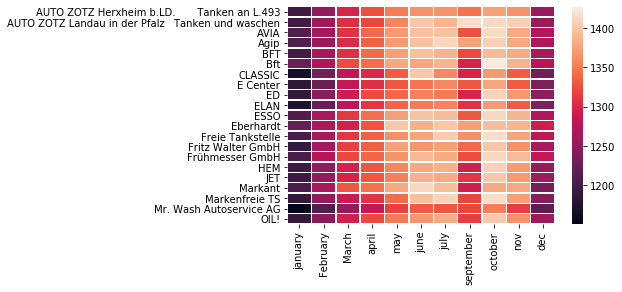

In [23]:
# print(history.head())
# stations = unique_prices['STID'][:21]
#stations
stations = history['BRAND'][:21]
price_by_month = prices[['STID','average_price', 'month','HR']].copy()
price_by_month_grouped =price_by_month[price_by_month['HR'].isin([12,13])]
price_by_month_grouped = pd.merge(price_by_month_grouped,station,on='STID')
price_by_month_grouped = price_by_month_grouped.groupby(['BRAND','month'])['average_price'].agg([pd.np.mean]).reset_index()

price_by_month_grouped =price_by_month_grouped[price_by_month_grouped['BRAND'].isin(stations)]

january = price_by_month_grouped[price_by_month_grouped['month']==1]
january.rename(columns={'mean': 'january'}, inplace=True)
january=january.drop(['month'], axis=1)

February= price_by_month_grouped[price_by_month_grouped['month']==2]
February.rename(columns={'mean': 'February'}, inplace=True)
February=February.drop(['month'], axis=1)

March= price_by_month_grouped[price_by_month_grouped['month']==3]
March.rename(columns={'mean': 'March'}, inplace=True)
March=March.drop(['month'], axis=1)

april= price_by_month_grouped[price_by_month_grouped['month']==4]
april.rename(columns={'mean': 'april'}, inplace=True)
april=april.drop(['month'], axis=1)

may= price_by_month_grouped[price_by_month_grouped['month']==5]
may.rename(columns={'mean': 'may'}, inplace=True)
may=may.drop(['month'], axis=1)

june= price_by_month_grouped[price_by_month_grouped['month']==6]
june.rename(columns={'mean': 'june'}, inplace=True)
june=june.drop(['month'], axis=1)

july= price_by_month_grouped[price_by_month_grouped['month']==7]
july.rename(columns={'mean': 'july'}, inplace=True)
july=july.drop(['month'], axis=1)

august= price_by_month_grouped[price_by_month_grouped['month']==8]
august.rename(columns={'mean': 'august'}, inplace=True)
august=august.drop(['month'], axis=1)

september= price_by_month_grouped[price_by_month_grouped['month']==9]
september.rename(columns={'mean': 'september'}, inplace=True)
september=september.drop(['month'], axis=1)

october= price_by_month_grouped[price_by_month_grouped['month']==10]
october.rename(columns={'mean': 'october'}, inplace=True)
october=october.drop(['month'], axis=1)

nov= price_by_month_grouped[price_by_month_grouped['month']==11]
nov.rename(columns={'mean': 'nov'}, inplace=True)
nov=nov.drop(['month'], axis=1)

dec= price_by_month_grouped[price_by_month_grouped['month']==12]
dec.rename(columns={'mean': 'dec'}, inplace=True)
dec=dec.drop(['month'], axis=1)

a =pd.merge(january, February, on='BRAND', how='inner')
b =pd.merge(a, March, on='BRAND', how='inner')
c =pd.merge(b, april, on='BRAND', how='inner')
d =pd.merge(c, may, on='BRAND', how='inner')
e =pd.merge(d, june, on='BRAND', how='inner')
f =pd.merge(e, july, on='BRAND', how='inner')
g =pd.merge(f, august, on='BRAND', how='inner')
g_ =pd.merge(f, september, on='BRAND', how='inner')
h =pd.merge(g_, october, on='BRAND', how='inner')
i =pd.merge(h, nov, on='BRAND', how='inner')
data =pd.merge(i, dec, on='BRAND', how='inner')
data=data.drop(['BRAND'], axis=1)
ax = sns.heatmap(data, linewidth=0.5,yticklabels=stations)
plt.show()



10.Describe a possible business potential in euros for the customer.
Define the constraints of the business case 5 lines,the answer max 15 lines(high level summary)

As per the above results we can derive that the prices keep fluctuating per station and gasoline type.
The cheapest station in average is Winkler. So, this brand can be preferred for refuelling.
Avoidance of expensive stations can be benefecial.
The cheapest price will be most likely on Saturday.
The cheapest price will be most likely at 18 Hour. Also prices get high in the months
january and decemeber.
Price is influenced by the hour a lot. So, when to refuel must mainly be based on hour
Using cheapest station can save upto 20 cents every time we refuel. 
So, there is a lot of saving potential,if we choose the cheapest stations ,days or hours for refuelling.
Moreover,we can discover a trend in the prices and predict the future prices.


In [24]:
import unittest
import pandas as pd

def get_min(df):
    return df.min()

def get_max(df):
    return df.max()

class MyTest(unittest.TestCase):
    def test_get_min(self):
        d = {'col1': [1, 0, 2, 9, 8, 5], 'col2': [10, 0, -1, 1, -4, 6]}
        df = pd.DataFrame(data=d)
        self.assertEqual(get_min(df["col1"]), 0)
        self.assertEqual(get_min(df["col2"]), -4)
        
    # Returns True if the string is in upper case. 
    def test_upper(self):         
        self.assertEqual('foo'.upper(), 'FOO')
        
    def test_get_max(self):
        d = {'col1': [1, 0, 2, 9, 8, 5], 'col2': [10, 0, -1, 1, -4, 6]}
        df = pd.DataFrame(data=d)
        self.assertEqual(get_max(df["col1"]), 9)
        self.assertEqual(get_max(df["col2"]), 10)
    
        
        

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.010s

OK
